<a href="https://colab.research.google.com/github/zychang2/COVID-19-Detection/blob/main/unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
!pip install plotly

In [ ]:
import opendatasets as op
import plotly
import pathlib
import cv2
import os
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm
import pandas as pd


In [ ]:
op.download("https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database/")

# username: cs7641lol
# key: 2f03f28c325ac1995a7d8072b82fa329

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: cs7641lol
Your Kaggle Key: ··········


100%|██████████| 778M/778M [00:13<00:00, 59.2MB/s]


In [ ]:
datasetFolder_covid = "covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images"
datasetFolder_lo = "covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity/images"
datasetFolder_normal = "covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images"
datasetFolder_vp = "covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia/images"
datasetFolder_cmask = "covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/masks"
datasetFolder_nmask = "covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/masks"

dataset_covid = pathlib.Path(datasetFolder_covid)
dataset_lo = pathlib.Path(datasetFolder_lo)
dataset_normal = pathlib.Path(datasetFolder_normal)
dataset_vp = pathlib.Path(datasetFolder_vp)
dataset_cm = pathlib.Path(datasetFolder_cmask)
dataset_nm = pathlib.Path(datasetFolder_nmask)

list_images_covid = list(dataset_covid.glob("*.*"))
list_images_lo = list(dataset_lo.glob("*.*"))
list_images_normal = list(dataset_normal.glob("*.*"))
list_images_vp = list(dataset_vp.glob("*.*"))
list_images_nmask = list(dataset_nm.glob("*.*"))
list_images_cmask = list(dataset_cm.glob("*.*"))

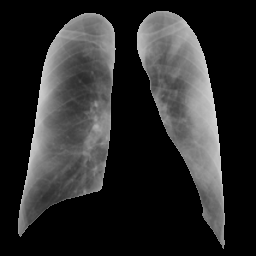

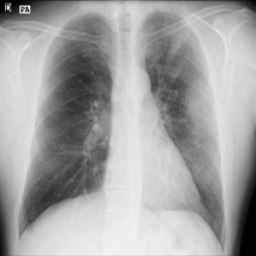

In [ ]:
# Masking process
from google.colab.patches import cv2_imshow
mask_org = cv2.imread(os.path.join(list_images_cmask[0]))
_m = cv2.cvtColor(mask_org, cv2.COLOR_BGR2GRAY) / 255.0
# _m = cv2.resize(_m, (32, 32), interpolation=cv2.INTER_AREA)
img_org = cv2.imread(os.path.join(list_images_covid[0]))
_i = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
_i = cv2.resize(_i, (256, 256), interpolation=cv2.INTER_AREA)
cv2_imshow(_m * _i)
cv2_imshow(_i)

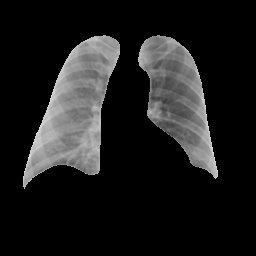

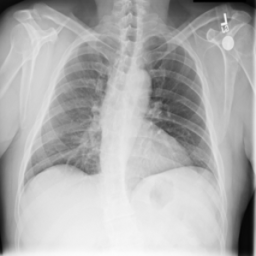

In [ ]:
mask_org = cv2.imread(os.path.join(list_images_nmask[0]))
_m = cv2.cvtColor(mask_org, cv2.COLOR_BGR2GRAY) / 255.0
# _m = cv2.resize(_m, (32, 32), interpolation=cv2.INTER_AREA)
img_org = cv2.imread(os.path.join(list_images_normal[0]))
_i = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
_i = cv2.resize(_i, (256, 256), interpolation=cv2.INTER_AREA)
cv2_imshow(_m * _i)
cv2_imshow(_i)

In [ ]:
# 3, 224, 224
model = nn.Sequential(
    nn.Conv2d(3, 32, 3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Dropout(0.2),
    nn.Conv2d(32, 16, 3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Dropout(0.2),
    nn.Conv2d(16, 8, 3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Dropout(0.2),
    nn.Conv2d(8, 3, 3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Dropout(0.2),
    nn.Flatten(0, -1)
).to("cuda")

In [ ]:
# img_ = cv2.imread(os.path.join(img))
# img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
# img_ = cv2.resize(img_, (32, 32), interpolation=cv2.INTER_AREA)

In [ ]:
data = []
# for img in tqdm(list_images_covid[:500]):
for img in tqdm(list_images_covid[:1200]):
  img_ = cv2.imread(os.path.join(img))
  img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
  img_ = cv2.resize(img_, (64, 64), interpolation=cv2.INTER_AREA)
  data.append(img_.flatten())

100%|██████████| 1200/1200 [00:02<00:00, 422.42it/s]


In [ ]:
for img in tqdm(list_images_lo[:1200]):
  img_ = cv2.imread(os.path.join(img))
  img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
  img_ = cv2.resize(img_, (64, 64), interpolation=cv2.INTER_AREA)
  data.append(img_.flatten())

100%|██████████| 1200/1200 [00:02<00:00, 440.26it/s]


In [ ]:
for img in tqdm(list_images_normal[:1200]):
  img_ = cv2.imread(os.path.join(img))
  img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
  img_ = cv2.resize(img_, (64, 64), interpolation=cv2.INTER_AREA)
  data.append(img_.flatten())

100%|██████████| 1200/1200 [00:02<00:00, 430.89it/s]


In [ ]:
for img in tqdm(list_images_vp[:1200]):
  img_ = cv2.imread(os.path.join(img))
  img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
  img_ = cv2.resize(img_, (64, 64), interpolation=cv2.INTER_AREA)
  data.append(img_.flatten())

100%|██████████| 1200/1200 [00:07<00:00, 153.18it/s]


In [ ]:
list_features = []
for img in tqdm(data):
  # features = model(img)
  list_features.append(img)

100%|██████████| 4800/4800 [00:00<00:00, 1187067.17it/s]


In [ ]:
list_features_pca = []
for list_feature in tqdm(list_features):
  list_features_pca.append(list_feature)

100%|██████████| 4800/4800 [00:00<00:00, 1133404.22it/s]


In [ ]:
list_features_pca = np.asarray(list_features_pca)

In [ ]:
list_features_pca.shape

(4800, 4096)

In [ ]:
from sklearn.decomposition import PCA
def pca(n_components=2):
  pca = PCA(n_components)
  result_pca = pca.fit_transform(list_features_pca)
  return result_pca

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
def RF(data, labels):
  rf = RandomForestClassifier().fit(data, labels)
  return rf

In [ ]:
def GMMClustering(n_clusters, data):
  return GaussianMixture(n_components=n_clusters, random_state=12345).fit(data)

In [ ]:
def modelClustering(n_clusters, data):
  return KMeans(n_clusters = n_clusters, random_state=12345, n_init='auto').fit(data)

In [ ]:
import plotly.express as px
import plotly.io as pio

In [ ]:
def visualize(X: np.ndarray, title: str) -> None:
  # print(reduced)
  # df = pd.DataFrame(data=X, columns=["Feature 1", "Feature 2", "Feature 3"])
  # df["Truth"] = y
  # # df["size"] = 0.001
  # fig2 = px.scatter_3d(df, x="Feature 1", y="Feature 2", z="Feature 3", color="Truth",
  #                      title=fig_title, width=600, height=400)
  # fig2.update_layout(margin=dict(l=0, r=0, b=10, t=50))
  # fig2.update_traces(marker_size=4)
  # fig2.show()
  avg_accuracy = np.average(X)
  n_components = np.arange(2, 2 + len(X), 1)
  plt.figure(figsize=(10, 5))
  plt.plot(n_components, X, marker='o', linestyle='-', color='b')
  # plt.axhline(y=avg_accuracy, color='r', linestyle='--')
  plt.xlabel('Number of PCA components')
  plt.ylabel('F1-score')
  plt.title(title)
  plt.grid(True)
  plt.show()


In [ ]:
labels = [0] * 1200 + [1] * 1200 + [2] * 1200 + [3] * 1200
# labels = [0] * 2000 + [1] * 2000
labels = np.array(labels)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, log_loss

accuracy_1 = []
f11 = []
accuracy_2 = []
f12 = []
accuracy_3 = []
f13 = []
ce = []
n_comp = 2
result_pca_all = pca(n_components=50)
while n_comp <= 50:
  result_pca = result_pca_all[:, :n_comp]
  # X_train, X_test, Y_train, Y_test = train_test_split(result_pca, labels, test_size=0.2, shuffle=True)
  # kmeans = modelClustering(n_clusters=4, data=result_pca)
  # acc = accuracy_score(labels, kmeans.predict(result_pca))
  # f11.append(f1_score(labels, kmeans.predict(result_pca), average='weighted'))
  # accuracy_1.append(acc)
  gmm = GMMClustering(n_clusters=4, data=result_pca)
  acc = accuracy_score(labels, gmm.predict(result_pca))
  f12.append(f1_score(labels, gmm.predict(result_pca), average='weighted'))
  accuracy_2.append(acc)
  ce.append(log_loss(labels, gmm.predict_proba(result_pca)))
  # rf = RF(X_train, Y_train)
  # acc = accuracy_score(Y_test, rf.predict(X_test))
  # f13.append(f1_score(Y_test, rf.predict(X_test), average='weighted'))
  # accuracy_3.append(acc)
  n_comp += 1

accuracy_1 = np.array(accuracy_1)
accuracy_2 = np.array(accuracy_2)
accuracy_3 = np.array(accuracy_3)
f11 = np.array(f11)
f12 = np.array(f12)
f13 = np.array(f13)

Low CE:  3.1898127237522007
PCA:  7
Max accuracy_2:  0.468125
PCA Components:  7


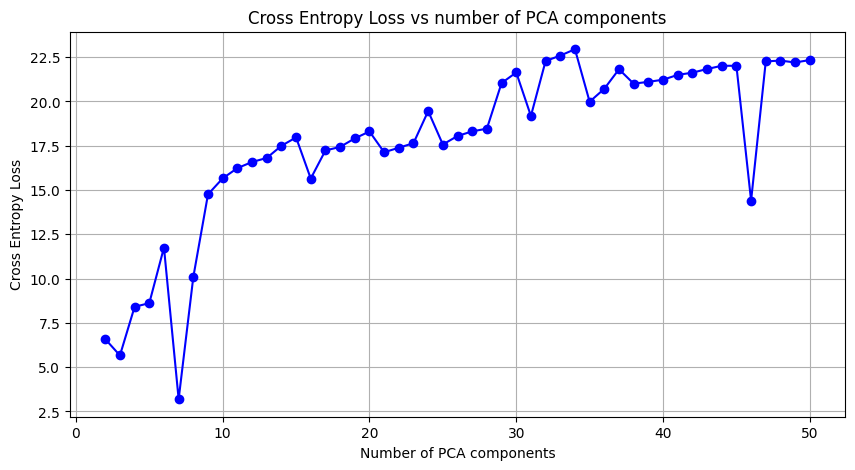

In [ ]:
ce = np.array(ce)
print('Low CE: ', np.min(ce))
print('PCA: ', np.argmin(ce ) + 2)
print("Max accuracy_2: ", np.max(accuracy_2))
print("PCA Components: ", np.argmax(accuracy_2) + 2)
n_components = np.arange(2, 2 + len(ce), 1)
plt.figure(figsize=(10, 5))
plt.plot(n_components, ce, marker='o', linestyle='-', color='b')
# plt.axhline(y=avg_accuracy, color='r', linestyle='--')
plt.xlabel('Number of PCA components')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss vs number of PCA components')
plt.grid(True)
plt.show()

In [ ]:
print("Max accuracy_1: ", np.max(accuracy_1))
print("PCA Components: ", np.argmax(accuracy_1) + 2)
print("Max accuracy_2: ", np.max(accuracy_2))
print("PCA Components: ", np.argmax(accuracy_2) + 2)
print("Max accuracy_3: ", np.max(accuracy_3))
print("PCA Components: ", np.argmax(accuracy_3) + 2)
print("Max F11: ", np.max(f11))
print("PCA Components: ", np.argmax(f11) + 2)
print("Max F12: ", np.max(f12))
print("PCA Components: ", np.argmax(f12) + 2)
print("Max F13: ", np.max(f13))
print("PCA Components: ", np.argmax(f13) + 2)

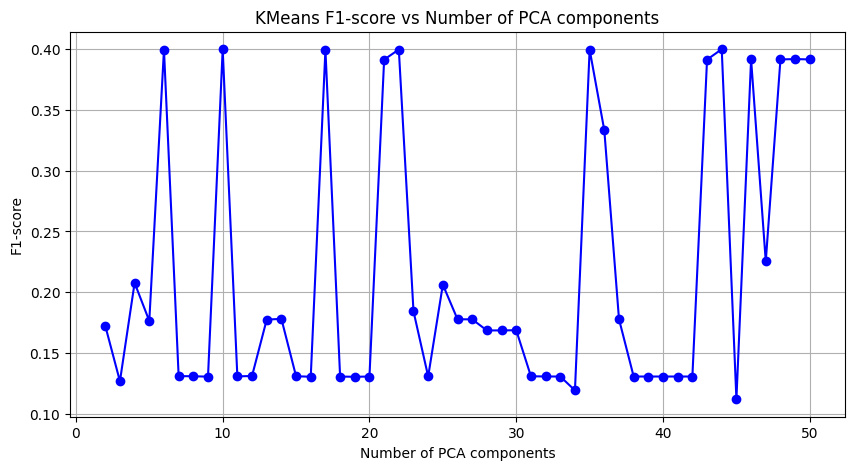

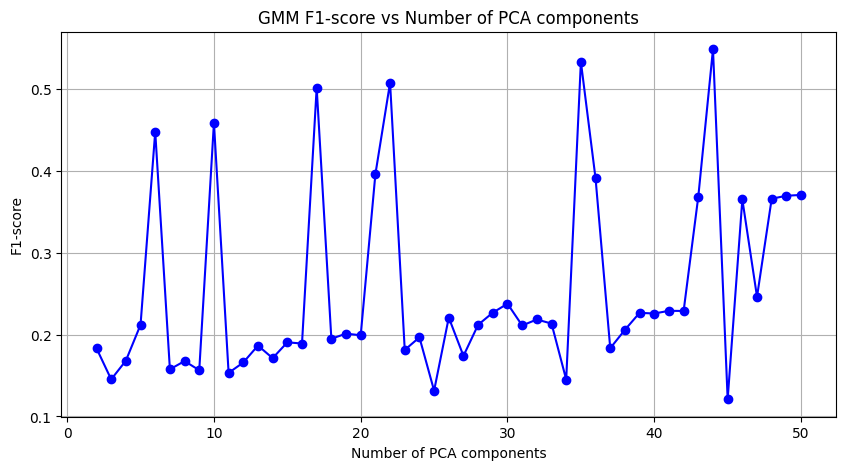

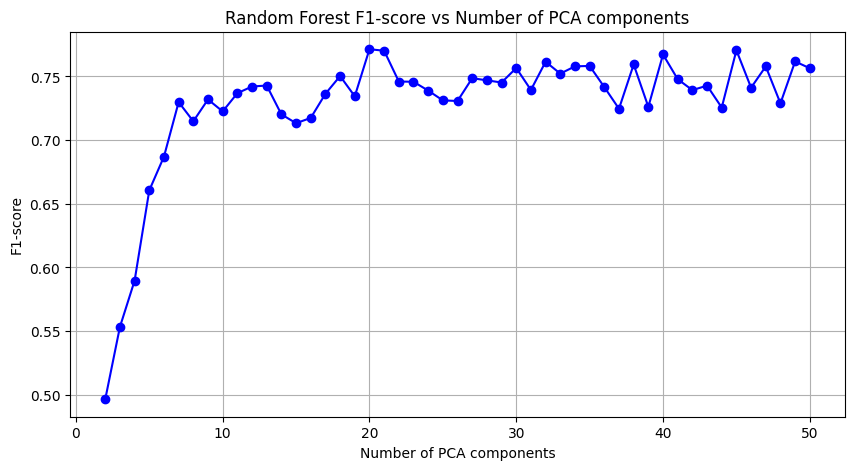

In [ ]:
visualize(f11, "KMeans F1-score vs Number of PCA components")
visualize(f12, "GMM F1-score vs Number of PCA components")
visualize(f13, "Random Forest F1-score vs Number of PCA components")

In [ ]:
# drawingResult(result_pca, labels)
visualize(result_pca, labels, "fig")

In [ ]:
visualize(result_pca, kmeans.labels_, "fig2")